##Importing libraries

#OBP Implementation

In [23]:
from sklearn.utils import shuffle
# Importing Librarries

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

class Perceptron():
  # Using data

  def __init__(self, data): # special method
    self.data = data
    self.X = data.data
    self.Y= data.target
    self.Feature = data.feature_names
    self.df = pd.DataFrame(data=self.X, columns=self.Feature)
    self.train = 0
    self.test = 0
    self.df['Target'] = self.Y
  
  def Rand(self, size):
    _Rand = np.random.rand(size)
    return _Rand

  def Sigmoid(self, _input):
      _Sigmoid = (2 / (1 + np.exp(-_input)) ) - 1
      return _Sigmoid

  def tanh(self, _input):
      return np.tanh(_input)

  def ReLU(self, _input):
      if _input < 0:
          return 0
      else:
          return 0.01 * _input
      
  def O(self, feature, weight, fcn):
      if fcn == 'sigmoid':
          return self.Sigmoid(np.dot(feature, weight))
      elif fcn == 'tanh':
          return self.tanh(np.dot(feature, weight))
      elif fcn == 'ReLU':
          return self.ReLU(np.dot(feature, weight))
      else:
          return -1
    
  def hyperparameter(self, _learning_rate=0.1, _E_max=1e6, _epoch=50):
    self.w = Rand(self.X.shape[1])
    self.learning_rate = _learning_rate
    self.E_max = _E_max
    self.epoch = _epoch

  def normalize_shuffle(self, _a, _frac = 0):

    scaler = preprocessing.MinMaxScaler()
    a = pd.DataFrame(data=self.data.data, )
    names = a.columns
    d = scaler.fit_transform(a)
    a = pd.DataFrame(d, columns=self.data.feature_names)

    # if _frac != 0:
    #   a = a.sample(frac=_frac).reset_index(drop=True)

    return a

  def shuffle(self, _a, _frac):
    a = _a.sample(frac=_frac).reset_index(drop=True)
    return a


  def train(self, type="full", b=False, train_frac="0.8", shuffled=False, normalize=False, act_func="sigmoid"):

    scaled_df = shuffle(self.df, 1.)

    if type == "full" and b == False:
      n_learning = int(self.X.shape[0])
      print(n_learning)
      e_lst = []

      for j in range(self.epoch):

          E = 0
          for i in range(n_learning):

              o = O(self.X[i], self.w, act_func)
              w += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.X[i])
              E += (0.5 * (Y[i] - o) ** 2)

              print(f"epoch_{j + 1} - input_{i+1} output: {o}")
              print(f"epoch_{j + 1} - input_{i+1} Error: {E}")

              if(E > self.E_max):
                  break
          e_lst.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst)

    if type != "full" and b == False:

      self.train = scaled_df.sample(train_frac).reset_index(drop=True)
      self.test = scaled_df.drop(index = self.train.index).reset_index(drop=True)

      n_learning = int(self.X.shape[0])
      # print(n_learning)
      e_lst = []

      for j in range(self.epoch):

          E = 0
          for i in range(n_learning):

              o = O(self.X[i], self.w, act_func)
              w += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.X[i])
              E += (0.5 * (Y[i] - o) ** 2)

              print(f"epoch_{j + 1} - input_{i+1} output: {o}")
              print(f"epoch_{j + 1} - input_{i+1} Error: {E}")

              if(E > self.E_max):
                  break
          e_lst.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst)

    if type == "full" and b == True:

      self.df = scaled_df
      self.df["bias"] = -1
      w_bias = self.Rand(self.df.shape[1])
      n_learning = self.df.shape[0]

      n_learning = int(self.X.shape[0])
      e_lst_learn = []
      for j in range(self.epoch):
          E = 0
          for i in range(n_learning):
              o = self.O(self.df.iloc[i], w_bias, act_func)
              w_bias += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.df.iloc[i])
              E += (0.5 * (self.Y[i] - o) ** 2)
      #         print(o)
              print(f"epoch_{j + 1} - input_{i+1}: {E}")
      #         print(w)
              if(E > self.E_max):
                  break
          e_lst_learn.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst_learn)

    if type != "full" and b == True:
      
      self.df = scaled_df
      self.df["bias"] = -1
      w_bias = self.Rand(self.df.shape[1])
      n_learning = self.df.shape[0]

      n_learning = int(self.X.shape[0])
      self.train = scaled_df.sample(train_frac).reset_index(drop=True)
      self.test = scaled_df.drop(index = self.train.index).reset_index(drop=True)

      n_learning = int(self.X.shape[0])

      e_lst_learn = []
      for j in range(self.epoch):
          E = 0
          for i in range(n_learning):
              o = O(self.train.iloc[i], w_bias, act_func)
              w_bias += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.train.iloc[i])
              E += (0.5 * (self.Y[i] - o) ** 2)
      #         print(o)
              print(f"epoch_{j + 1} - input_{i+1}: {E}")
      #         print(w)
              if(E > self.E_max):
                  break
          e_lst_learn.append(E)

      iteration = np.arange(1,epoch+1,1)
      plt.plot(iteration, e_lst_learn)



##Script

In [24]:
# a = Perceptron(load_breast_cancer()).hyperparameter(0.1,1e6, 50)
# a.train()


#Functional Implementation

In [25]:
# Importing Librarries

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


## Loading X, Y from load_breast_cancer() class

In [26]:
# Using data

data = load_breast_cancer()
X = data.data
Y = data.target

Feature = data.feature_names
df = pd.DataFrame(data=X, columns=Feature)
df['Target'] = Y

df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  Target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

##Functions

In [27]:
# Functions

def Rand(size):
    _Rand = np.random.rand(size)
    return _Rand

def Sigmoid(_input):
    _Sigmoid = (2 / (1 + np.exp(-_input)) ) - 1
    return _Sigmoid

def tanh(_input):
    return np.tanh(_input)

def ReLU(_input):
    if _input < 0:
        return 0
    else:
        return 0.01 * _input
    
def O(feature, weight, fcn):
    if fcn == 'sigmoid':
        return Sigmoid(np.dot(feature, weight))
    elif fcn == 'tanh':
        return tanh(np.dot(feature, weight))
    elif fcn == 'ReLU':
        return ReLU(np.dot(feature, weight))
    else:
        return -1



##Hyper Parameters

In [28]:
# Hyper_params

w = Rand(X.shape[1])
print(w)
learning_rate = 0.1
E_max = 1e6
E = 0
epoch = 50

[0.06964265 0.49313276 0.26978209 0.20757829 0.02465697 0.12435585
 0.69065565 0.31132198 0.81812306 0.57047464 0.85395415 0.32949633
 0.20704696 0.20143253 0.65438017 0.15284393 0.92153766 0.7172254
 0.05457995 0.7501684  0.70720568 0.61224309 0.18603499 0.7440299
 0.5658254  0.30403055 0.83846278 0.26336215 0.40574228 0.4950819 ]


##Without being shuffled and normalized

In [29]:
n_learning = int(np.round(X.shape[0] * 1))

569
epoch_1 - input_1: 0.5
epoch_1 - input_2: 1.0
epoch_1 - input_3: 1.5
epoch_1 - input_4: 2.0
epoch_1 - input_5: 2.5
epoch_1 - input_6: 3.0
epoch_1 - input_7: 3.5
epoch_1 - input_8: 4.0
epoch_1 - input_9: 4.5
epoch_1 - input_10: 5.0
epoch_1 - input_11: 5.5
epoch_1 - input_12: 6.0
epoch_1 - input_13: 6.5
epoch_1 - input_14: 7.0
epoch_1 - input_15: 7.5
epoch_1 - input_16: 8.0
epoch_1 - input_17: 8.5
epoch_1 - input_18: 9.0
epoch_1 - input_19: 9.5
epoch_1 - input_20: 9.5
epoch_1 - input_21: 9.5
epoch_1 - input_22: 9.5
epoch_1 - input_23: 10.0
epoch_1 - input_24: 10.5
epoch_1 - input_25: 11.0
epoch_1 - input_26: 11.5
epoch_1 - input_27: 12.0
epoch_1 - input_28: 12.5
epoch_1 - input_29: 13.0
epoch_1 - input_30: 13.5
epoch_1 - input_31: 14.0
epoch_1 - input_32: 14.5
epoch_1 - input_33: 15.0
epoch_1 - input_34: 15.5
epoch_1 - input_35: 16.0
epoch_1 - input_36: 16.5
epoch_1 - input_37: 17.0
epoch_1 - input_38: 17.0
epoch_1 - input_39: 17.5
epoch_1 - input_40: 18.0
epoch_1 - input_41: 18.5
ep

epoch_27 - input_517: 100.5
epoch_27 - input_518: 101.0
epoch_27 - input_519: 101.0
epoch_27 - input_520: 101.0
epoch_27 - input_521: 101.0
epoch_27 - input_522: 101.5
epoch_27 - input_523: 101.5
epoch_27 - input_524: 101.5
epoch_27 - input_525: 101.5
epoch_27 - input_526: 101.5
epoch_27 - input_527: 101.5
epoch_27 - input_528: 101.5
epoch_27 - input_529: 101.5
epoch_27 - input_530: 101.5
epoch_27 - input_531: 101.5
epoch_27 - input_532: 101.5
epoch_27 - input_533: 101.5
epoch_27 - input_534: 102.0
epoch_27 - input_535: 102.0
epoch_27 - input_536: 102.5
epoch_27 - input_537: 103.0
epoch_27 - input_538: 103.0
epoch_27 - input_539: 103.0
epoch_27 - input_540: 103.0
epoch_27 - input_541: 103.0
epoch_27 - input_542: 103.0
epoch_27 - input_543: 103.0
epoch_27 - input_544: 103.0
epoch_27 - input_545: 103.0
epoch_27 - input_546: 103.0
epoch_27 - input_547: 103.0
epoch_27 - input_548: 103.0
epoch_27 - input_549: 103.0
epoch_27 - input_550: 103.0
epoch_27 - input_551: 103.0
epoch_27 - input_552

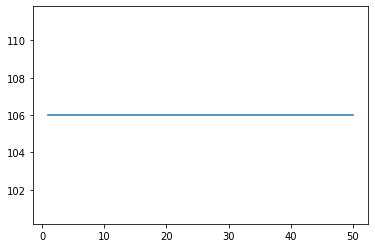

In [30]:

print(n_learning)
e_lst = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(X[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * X[i])
        E += (0.5 * (Y[i] - o) ** 2)
        # print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
        if(E > E_max):
            break
    # e_lst.append(E / n_learning)
    e_lst.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst)

## Normalizing

In [31]:
# normalizing

scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(X)
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=data.feature_names)
scaled_df.head()



mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   
3                1.000000  ...      0.248310       0.385928         0.241347   
4                0.186816  ...      0.519744       0.123934         0.506948   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 30 columns]

 ## shuffling and reseting indexes

In [32]:
scaled_df = scaled_df.sample(frac=1.).reset_index(drop=True)
scaled_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.569786      0.503213        0.540460   0.395546         0.339984   
1     0.624686      0.482246        0.690415   0.467232         0.685836   
2     0.254579      0.298613        0.243383   0.137094         0.290151   
3     0.692366      0.425093        0.695253   0.535949         0.578406   
4     0.305694      0.401420        0.292931   0.177943         0.261713   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.310472        0.343955             0.411083       0.451010   
1          1.000000        0.879569             0.797217       0.932323   
2          0.149592        0.061926             0.095477       0.273737   
3          0.580701        0.658388             0.776342       0.556566   
4          0.125544        0.072868             0.100944       0.365657   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.133319  ...      0.591604       0.490139         0.510434   
1                0.662595  ...      0.549271       0.525053         0.597091   
2                0.225358  ...      0.190679       0.412313         0.175059   
3                0.339090  ...      0.651014       0.445629         0.605558   
4                0.124473  ...      0.284596       0.485874         0.259425   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.353372          0.354817           0.284571         0.459665   
1    0.353372          0.612362           0.571557         0.613498   
2    0.088208          0.311893           0.163974         0.154712   
3    0.465936          0.521891           0.528189         0.563339   
4    0.148127          0.252460           0.171736         0.166534   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.672165        0.471319                 0.248196  
1              0.861856        0.763848                 0.292536  
2              0.290103        0.279519                 0.110258  
3              0.832302        0.446087                 0.299488  
4              0.382131        0.281687                 0.107700  

[5 rows x 30 columns]

##Train & Test parameter assignment

In [33]:
train = scaled_df.sample(frac = 0.8).reset_index(drop=True)
test = scaled_df.drop(index = train.index).reset_index(drop=True)
print(train.shape, test.shape)
train.head()
test.head()


(455, 30) (114, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.306167      0.290497        0.295833   0.174592         0.447504   
1     0.967343      0.560027        0.988943   1.000000         0.503476   
2     0.589663      0.308083        0.582614   0.434146         0.507990   
3     0.246060      0.274941        0.234953   0.130477         0.468268   
4     0.196365      0.430504        0.191417   0.099639         0.388463   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.191001        0.093112             0.138171       0.291919   
1          0.550334        0.851687             0.839463       0.505556   
2          0.384700        0.528585             0.593439       0.385354   
3          0.157015        0.058341             0.146173       0.424242   
4          0.191890        0.113027             0.112177       0.489899   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.150379  ...      0.255069       0.371002         0.234972   
1                0.132056  ...      1.000000       0.515725         1.000000   
2                0.235678  ...      0.570260       0.489606         0.515414   
3                0.345198  ...      0.174315       0.237207         0.158026   
4                0.327717  ...      0.145500       0.432836         0.136411   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.126376          0.414251           0.143406         0.110304   
1    1.000000          0.426137           0.386442         0.545767   
2    0.382127          0.529816           0.334924         0.474121   
3    0.076190          0.282837           0.064315         0.039776   
4    0.061787          0.247837           0.146414         0.124920   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.271856        0.219397                 0.072084  
1              0.902062        0.212103                 0.126131  
2              0.707904        0.335305                 0.229896  
3              0.202131        0.130495                 0.122786  
4              0.220378        0.316184                 0.165814  

[5 rows x 30 columns]

##Training with all data

epoch_1 - input_1: 0.47091266036947715
epoch_1 - input_2: 0.9691455119637273
epoch_1 - input_3: 1.25908974663844
epoch_1 - input_4: 1.7497492695759014
epoch_1 - input_5: 2.0857316107470134
epoch_1 - input_6: 2.5691163195012834
epoch_1 - input_7: 3.0282440499698864
epoch_1 - input_8: 3.3355709446286967
epoch_1 - input_9: 3.780034948006161
epoch_1 - input_10: 4.256529990461191
epoch_1 - input_11: 4.630699029298741
epoch_1 - input_12: 5.073684162390802
epoch_1 - input_13: 5.551399508679796
epoch_1 - input_14: 5.830760732926944
epoch_1 - input_15: 6.215022617688763
epoch_1 - input_16: 6.6787570148506745
epoch_1 - input_17: 7.123874113118536
epoch_1 - input_18: 7.402456360664465
epoch_1 - input_19: 7.637141524916285
epoch_1 - input_20: 7.6453467808909235
epoch_1 - input_21: 7.647386585444396
epoch_1 - input_22: 7.67116029731666
epoch_1 - input_23: 8.114782449195102
epoch_1 - input_24: 8.575295653586743
epoch_1 - input_25: 9.003417688261155
epoch_1 - input_26: 9.355810193883848
epoch_1 - inp

epoch_4 - input_9: 2.9807562969685937
epoch_4 - input_10: 3.3299895204111207
epoch_4 - input_11: 3.6180100638286232
epoch_4 - input_12: 3.91831814613035
epoch_4 - input_13: 4.326366300974566
epoch_4 - input_14: 4.4970450027946045
epoch_4 - input_15: 4.7231722467193205
epoch_4 - input_16: 5.024043908915172
epoch_4 - input_17: 5.295451608273684
epoch_4 - input_18: 5.451965116093409
epoch_4 - input_19: 5.580514687401364
epoch_4 - input_20: 5.662862334484635
epoch_4 - input_21: 5.696785631357955
epoch_4 - input_22: 5.805638995971027
epoch_4 - input_23: 6.072056227695374
epoch_4 - input_24: 6.402177143241544
epoch_4 - input_25: 6.620265656698177
epoch_4 - input_26: 6.834382231500905
epoch_4 - input_27: 6.950509089296846
epoch_4 - input_28: 7.140010784613819
epoch_4 - input_29: 7.300389383749981
epoch_4 - input_30: 7.475285628759755
epoch_4 - input_31: 7.563209494355562
epoch_4 - input_32: 7.671098969832736
epoch_4 - input_33: 7.910052947578111
epoch_4 - input_34: 8.085039224428622
epoch_4 -

epoch_7 - input_19: 5.277941069906571
epoch_7 - input_20: 5.3857713097670645
epoch_7 - input_21: 5.4336172050960725
epoch_7 - input_22: 5.541937462953208
epoch_7 - input_23: 5.774422103561704
epoch_7 - input_24: 6.068478470647297
epoch_7 - input_25: 6.234019709673875
epoch_7 - input_26: 6.442215086668813
epoch_7 - input_27: 6.552473775605011
epoch_7 - input_28: 6.734832469847815
epoch_7 - input_29: 6.824277443319084
epoch_7 - input_30: 6.998073557379432
epoch_7 - input_31: 7.090237714936606
epoch_7 - input_32: 7.198785008113245
epoch_7 - input_33: 7.374653656145043
epoch_7 - input_34: 7.519501123003399
epoch_7 - input_35: 7.655337004989104
epoch_7 - input_36: 7.768051051935326
epoch_7 - input_37: 7.816497752728569
epoch_7 - input_38: 7.9525673985803635
epoch_7 - input_39: 8.147895687278844
epoch_7 - input_40: 8.207697292057983
epoch_7 - input_41: 8.253908938232263
epoch_7 - input_42: 8.406699512096631
epoch_7 - input_43: 8.444024434327998
epoch_7 - input_44: 8.566361092527487
epoch_7 -

epoch_10 - input_8: 2.424568555186778
epoch_10 - input_9: 2.7665625022657845
epoch_10 - input_10: 3.059796436850581
epoch_10 - input_11: 3.373523577902234
epoch_10 - input_12: 3.6250165321884174
epoch_10 - input_13: 4.009019003055237
epoch_10 - input_14: 4.18764940182986
epoch_10 - input_15: 4.384215530153854
epoch_10 - input_16: 4.6073618887897805
epoch_10 - input_17: 4.818387930498572
epoch_10 - input_18: 4.9836019015984245
epoch_10 - input_19: 5.1257981810735
epoch_10 - input_20: 5.244294195611193
epoch_10 - input_21: 5.298860127339055
epoch_10 - input_22: 5.404205325313292
epoch_10 - input_23: 5.620195555543714
epoch_10 - input_24: 5.891000908953002
epoch_10 - input_25: 6.034168884837953
epoch_10 - input_26: 6.23525112053445
epoch_10 - input_27: 6.344637421655144
epoch_10 - input_28: 6.532112546700849
epoch_10 - input_29: 6.596787969038101
epoch_10 - input_30: 6.7687083364153615
epoch_10 - input_31: 6.863184389706782
epoch_10 - input_32: 6.976843764157592
epoch_10 - input_33: 7.123

epoch_14 - input_113: 16.880719405536244
epoch_14 - input_114: 16.914245679213654
epoch_14 - input_115: 16.988288711238468
epoch_14 - input_116: 17.068150943806685
epoch_14 - input_117: 17.175138508769262
epoch_14 - input_118: 17.394804383473357
epoch_14 - input_119: 17.631757105414106
epoch_14 - input_120: 17.733012139611766
epoch_14 - input_121: 17.791545452117273
epoch_14 - input_122: 17.949394090319096
epoch_14 - input_123: 18.13475813126613
epoch_14 - input_124: 18.265997152957357
epoch_14 - input_125: 18.377155314520987
epoch_14 - input_126: 18.525077619974606
epoch_14 - input_127: 18.669960478614602
epoch_14 - input_128: 18.94333707009536
epoch_14 - input_129: 18.97330769440321
epoch_14 - input_130: 19.084392336206623
epoch_14 - input_131: 19.133407321421775
epoch_14 - input_132: 19.27122904429084
epoch_14 - input_133: 19.382406579868377
epoch_14 - input_134: 19.490133589863373
epoch_14 - input_135: 19.651486862170074
epoch_14 - input_136: 19.88204566190492
epoch_14 - input_137:

epoch_18 - input_66: 10.69395389241286
epoch_18 - input_67: 10.796912104390907
epoch_18 - input_68: 11.071039331385458
epoch_18 - input_69: 11.301706338608104
epoch_18 - input_70: 11.412010498777564
epoch_18 - input_71: 11.605413997518175
epoch_18 - input_72: 11.67695117887496
epoch_18 - input_73: 11.914769131084979
epoch_18 - input_74: 11.978134658381697
epoch_18 - input_75: 12.156242913881167
epoch_18 - input_76: 12.228570770246833
epoch_18 - input_77: 12.375453931411686
epoch_18 - input_78: 12.482775337388478
epoch_18 - input_79: 12.541101948141714
epoch_18 - input_80: 12.628434316470118
epoch_18 - input_81: 12.860935848592787
epoch_18 - input_82: 13.039250294056103
epoch_18 - input_83: 13.200906158493053
epoch_18 - input_84: 13.396187704547172
epoch_18 - input_85: 13.459285254320957
epoch_18 - input_86: 13.699527506110556
epoch_18 - input_87: 13.883882648702587
epoch_18 - input_88: 13.96895880348996
epoch_18 - input_89: 14.105344206367437
epoch_18 - input_90: 14.224691458045795
epo

epoch_21 - input_146: 20.653604620826638
epoch_21 - input_147: 20.757360015672294
epoch_21 - input_148: 20.79288803714561
epoch_21 - input_149: 20.812329533713797
epoch_21 - input_150: 20.937300594555538
epoch_21 - input_151: 21.064622935222776
epoch_21 - input_152: 21.204714328618483
epoch_21 - input_153: 21.248267945344477
epoch_21 - input_154: 21.333297860799597
epoch_21 - input_155: 21.392847457653215
epoch_21 - input_156: 21.462695651725564
epoch_21 - input_157: 21.69848793578643
epoch_21 - input_158: 21.746532835611088
epoch_21 - input_159: 21.847387969512358
epoch_21 - input_160: 21.856497535560806
epoch_21 - input_161: 21.886647444815566
epoch_21 - input_162: 22.00269559945598
epoch_21 - input_163: 22.199980951043514
epoch_21 - input_164: 22.31589375874717
epoch_21 - input_165: 22.621488013998874
epoch_21 - input_166: 22.643377873466054
epoch_21 - input_167: 22.74940948431893
epoch_21 - input_168: 22.9961191209008
epoch_21 - input_169: 23.283126083069753
epoch_21 - input_170: 2

epoch_23 - input_247: 33.05096097345943
epoch_23 - input_248: 33.153550876870554
epoch_23 - input_249: 33.22308267236022
epoch_23 - input_250: 33.24779025029572
epoch_23 - input_251: 33.410517091363126
epoch_23 - input_252: 33.542652556005315
epoch_23 - input_253: 33.945576247016916
epoch_23 - input_254: 34.199665443067964
epoch_23 - input_255: 34.39970657412612
epoch_23 - input_256: 34.523509612355646
epoch_23 - input_257: 34.63731418141135
epoch_23 - input_258: 34.758834829856404
epoch_23 - input_259: 34.90307742195194
epoch_23 - input_260: 35.04926757674142
epoch_23 - input_261: 35.132629851945474
epoch_23 - input_262: 35.28196822632307
epoch_23 - input_263: 35.337824905379904
epoch_23 - input_264: 35.38847657590818
epoch_23 - input_265: 35.545924633374774
epoch_23 - input_266: 35.71512126569554
epoch_23 - input_267: 35.89437187628709
epoch_23 - input_268: 36.07894393401809
epoch_23 - input_269: 36.19232883771507
epoch_23 - input_270: 36.39533273798831
epoch_23 - input_271: 36.54081

epoch_26 - input_77: 12.272831869466538
epoch_26 - input_78: 12.38026462656228
epoch_26 - input_79: 12.43990956926628
epoch_26 - input_80: 12.528768637620104
epoch_26 - input_81: 12.7474849507648
epoch_26 - input_82: 12.917380621002794
epoch_26 - input_83: 13.075295933498472
epoch_26 - input_84: 13.269752123654426
epoch_26 - input_85: 13.34447230416662
epoch_26 - input_86: 13.575749836140401
epoch_26 - input_87: 13.765655860358992
epoch_26 - input_88: 13.855241926781726
epoch_26 - input_89: 13.985807667749427
epoch_26 - input_90: 14.100515233945943
epoch_26 - input_91: 14.245336894923472
epoch_26 - input_92: 14.321281624229862
epoch_26 - input_93: 14.494249569703683
epoch_26 - input_94: 14.538265266855602
epoch_26 - input_95: 14.689742370150837
epoch_26 - input_96: 14.83780686368147
epoch_26 - input_97: 14.962033100574633
epoch_26 - input_98: 15.018340001320087
epoch_26 - input_99: 15.097548308390223
epoch_26 - input_100: 15.185208421375417
epoch_26 - input_101: 15.237021123924189
epoc

epoch_27 - input_439: 52.16806265363252
epoch_27 - input_440: 52.232679163061306
epoch_27 - input_441: 52.24694693598891
epoch_27 - input_442: 52.41991228606363
epoch_27 - input_443: 52.432149176416836
epoch_27 - input_444: 52.446009841889754
epoch_27 - input_445: 52.69097728538734
epoch_27 - input_446: 52.74417898508562
epoch_27 - input_447: 52.93204397968497
epoch_27 - input_448: 52.9490252580322
epoch_27 - input_449: 52.973532575476675
epoch_27 - input_450: 53.337722991559446
epoch_27 - input_451: 53.38062866627831
epoch_27 - input_452: 53.673696966089466
epoch_27 - input_453: 53.69396889282567
epoch_27 - input_454: 53.738376039947596
epoch_27 - input_455: 53.814373854759765
epoch_27 - input_456: 53.874710102405196
epoch_27 - input_457: 53.87842426798073
epoch_27 - input_458: 53.90028687078463
epoch_27 - input_459: 53.93331804140264
epoch_27 - input_460: 53.95797869338888
epoch_27 - input_461: 54.13588549075416
epoch_27 - input_462: 54.35530764544907
epoch_27 - input_463: 54.4018197

epoch_29 - input_237: 31.830400383532577
epoch_29 - input_238: 31.89550714539381
epoch_29 - input_239: 32.02303588289221
epoch_29 - input_240: 32.196097395712435
epoch_29 - input_241: 32.38209429121295
epoch_29 - input_242: 32.454695987808726
epoch_29 - input_243: 32.56084769214496
epoch_29 - input_244: 32.61216596375204
epoch_29 - input_245: 32.82724341378615
epoch_29 - input_246: 32.86912377861526
epoch_29 - input_247: 32.89839034911179
epoch_29 - input_248: 32.99966813592725
epoch_29 - input_249: 33.065330285689235
epoch_29 - input_250: 33.09123610352485
epoch_29 - input_251: 33.25463078922539
epoch_29 - input_252: 33.390369614720086
epoch_29 - input_253: 33.796239791948956
epoch_29 - input_254: 34.04234309978299
epoch_29 - input_255: 34.24084568871343
epoch_29 - input_256: 34.36014761707031
epoch_29 - input_257: 34.47646646553733
epoch_29 - input_258: 34.59610730812151
epoch_29 - input_259: 34.74467215173397
epoch_29 - input_260: 34.89006626575332
epoch_29 - input_261: 34.976929362

epoch_33 - input_385: 47.054763240387715
epoch_33 - input_386: 47.34716332232341
epoch_33 - input_387: 47.403577575383345
epoch_33 - input_388: 47.48074861289676
epoch_33 - input_389: 47.51832413626676
epoch_33 - input_390: 47.86529209557317
epoch_33 - input_391: 47.89518793118971
epoch_33 - input_392: 47.89560557080615
epoch_33 - input_393: 48.11070234935875
epoch_33 - input_394: 48.33811445137315
epoch_33 - input_395: 48.346877276876306
epoch_33 - input_396: 48.398602209158426
epoch_33 - input_397: 48.40556692727582
epoch_33 - input_398: 48.42288209273178
epoch_33 - input_399: 48.479632371854166
epoch_33 - input_400: 48.52709296754871
epoch_33 - input_401: 48.80304770112633
epoch_33 - input_402: 48.816098687883915
epoch_33 - input_403: 48.909516509902005
epoch_33 - input_404: 48.96428233851354
epoch_33 - input_405: 49.04526492447111
epoch_33 - input_406: 49.09263501853494
epoch_33 - input_407: 49.116375006307216
epoch_33 - input_408: 49.153468446864515
epoch_33 - input_409: 49.314065

epoch_38 - input_530: 60.404583547257424
epoch_38 - input_531: 60.50712509960446
epoch_38 - input_532: 60.53682620758412
epoch_38 - input_533: 60.557710835736344
epoch_38 - input_534: 60.80739906704607
epoch_38 - input_535: 60.86721391277968
epoch_38 - input_536: 61.136282395311014
epoch_38 - input_537: 61.52894457703185
epoch_38 - input_538: 61.591496781883144
epoch_38 - input_539: 61.615842651044254
epoch_38 - input_540: 61.64752964493085
epoch_38 - input_541: 61.66470576228453
epoch_38 - input_542: 61.70665966216388
epoch_38 - input_543: 61.71212727699039
epoch_38 - input_544: 61.760185216355964
epoch_38 - input_545: 61.80574046538207
epoch_38 - input_546: 61.82965784408129
epoch_38 - input_547: 61.8983563686451
epoch_38 - input_548: 61.95283032412291
epoch_38 - input_549: 61.98982283473021
epoch_38 - input_550: 62.06538894678541
epoch_38 - input_551: 62.09153330121606
epoch_38 - input_552: 62.13327469596541
epoch_38 - input_553: 62.15285936158061
epoch_38 - input_554: 62.1998920058

epoch_41 - input_539: 61.52554750295797
epoch_41 - input_540: 61.558326617174934
epoch_41 - input_541: 61.574991599510106
epoch_41 - input_542: 61.6166482672771
epoch_41 - input_543: 61.62220820750271
epoch_41 - input_544: 61.669604854754915
epoch_41 - input_545: 61.71494210551161
epoch_41 - input_546: 61.73856704724777
epoch_41 - input_547: 61.806985226196744
epoch_41 - input_548: 61.862497929302464
epoch_41 - input_549: 61.899409005872556
epoch_41 - input_550: 61.97403144926791
epoch_41 - input_551: 62.00035368765843
epoch_41 - input_552: 62.04193175844617
epoch_41 - input_553: 62.06142868691562
epoch_41 - input_554: 62.10878059973335
epoch_41 - input_555: 62.115384715723025
epoch_41 - input_556: 62.15208320820828
epoch_41 - input_557: 62.16134780484408
epoch_41 - input_558: 62.18542507886429
epoch_41 - input_559: 62.22896078028504
epoch_41 - input_560: 62.25316740092559
epoch_41 - input_561: 62.30030533687394
epoch_41 - input_562: 62.32542611926423
epoch_41 - input_563: 62.643649833

epoch_45 - input_460: 53.50499497862362
epoch_45 - input_461: 53.687548831435784
epoch_45 - input_462: 53.906330013790416
epoch_45 - input_463: 53.95272204964099
epoch_45 - input_464: 53.96804321675639
epoch_45 - input_465: 54.03359326803594
epoch_45 - input_466: 54.076790022443774
epoch_45 - input_467: 54.15512198364755
epoch_45 - input_468: 54.197967834076024
epoch_45 - input_469: 54.50091061266569
epoch_45 - input_470: 54.57417297078678
epoch_45 - input_471: 54.60491196480935
epoch_45 - input_472: 54.628056658451705
epoch_45 - input_473: 54.63270056452647
epoch_45 - input_474: 54.67019871060232
epoch_45 - input_475: 54.70285127109826
epoch_45 - input_476: 54.74302284355624
epoch_45 - input_477: 54.90330164313906
epoch_45 - input_478: 54.973159305517996
epoch_45 - input_479: 55.05921294749212
epoch_45 - input_480: 55.313000523521254
epoch_45 - input_481: 55.32934630249229
epoch_45 - input_482: 55.338195270237115
epoch_45 - input_483: 55.36922777164766
epoch_45 - input_484: 55.4515527

epoch_47 - input_205: 27.446503041053056
epoch_47 - input_206: 27.585564727191176
epoch_47 - input_207: 27.71245449874991
epoch_47 - input_208: 27.83727269366992
epoch_47 - input_209: 27.948554337627698
epoch_47 - input_210: 28.02175908709375
epoch_47 - input_211: 28.14037284585617
epoch_47 - input_212: 28.251986468079846
epoch_47 - input_213: 28.425860561507616
epoch_47 - input_214: 28.514230900262017
epoch_47 - input_215: 28.65103672156653
epoch_47 - input_216: 28.76673098222724
epoch_47 - input_217: 28.90374364998741
epoch_47 - input_218: 29.049255696031928
epoch_47 - input_219: 29.164799012331507
epoch_47 - input_220: 29.34475056320707
epoch_47 - input_221: 29.488899327412902
epoch_47 - input_222: 29.590040606829596
epoch_47 - input_223: 29.71001758005011
epoch_47 - input_224: 29.839363245846158
epoch_47 - input_225: 29.935419171529265
epoch_47 - input_226: 30.105896446274897
epoch_47 - input_227: 30.220834275830697
epoch_47 - input_228: 30.321992575917367
epoch_47 - input_229: 30.

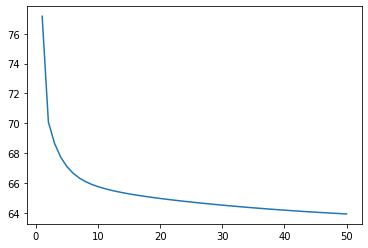

In [34]:
e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(569):
        o = O(scaled_df.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

test and train data

In [35]:
# train
# test
n_learning = train.shape[0]
print(n_learning)

455


##Training with "train" Data

epoch_1 - input_1: 0.2876227698086443
epoch_1 - input_2: 0.6248856031418053
epoch_1 - input_3: 0.8477115209714106
epoch_1 - input_4: 0.9938282321628696
epoch_1 - input_5: 1.3179598159404835
epoch_1 - input_6: 1.6235200750794343
epoch_1 - input_7: 1.9973908463293553
epoch_1 - input_8: 2.2557280404852
epoch_1 - input_9: 2.472025113923087
epoch_1 - input_10: 2.677918899045158
epoch_1 - input_11: 2.9106187760444993
epoch_1 - input_12: 3.1272198878264184
epoch_1 - input_13: 3.3459386327229974
epoch_1 - input_14: 3.5547815331954413
epoch_1 - input_15: 3.7284335052762203
epoch_1 - input_16: 3.8753077915369056
epoch_1 - input_17: 4.050014622354407
epoch_1 - input_18: 4.360169968723142
epoch_1 - input_19: 4.554545905290777
epoch_1 - input_20: 4.682555643416136
epoch_1 - input_21: 4.763049848613545
epoch_1 - input_22: 4.842291259185732
epoch_1 - input_23: 5.008890458534707
epoch_1 - input_24: 5.303491306660414
epoch_1 - input_25: 5.44713171276158
epoch_1 - input_26: 5.595826782733148
epoch_1 - i

epoch_6 - input_435: 52.05786218352994
epoch_6 - input_436: 52.350076552069694
epoch_6 - input_437: 52.3821540749126
epoch_6 - input_438: 52.43701763314622
epoch_6 - input_439: 52.49731137046029
epoch_6 - input_440: 52.5462433964601
epoch_6 - input_441: 52.58744497366057
epoch_6 - input_442: 52.91515242399561
epoch_6 - input_443: 52.92348017481488
epoch_6 - input_444: 52.94762485631186
epoch_6 - input_445: 53.25330860253379
epoch_6 - input_446: 53.28665560898347
epoch_6 - input_447: 53.62229577191962
epoch_6 - input_448: 53.65181137069807
epoch_6 - input_449: 53.72329371962409
epoch_6 - input_450: 54.189032961650305
epoch_6 - input_451: 54.22252492607039
epoch_6 - input_452: 54.54091247739085
epoch_6 - input_453: 54.59601796242959
epoch_6 - input_454: 54.621086709181554
epoch_6 - input_455: 54.639878115385585
epoch_7 - input_1: 0.27596218685654966
epoch_7 - input_2: 0.5664847258875054
epoch_7 - input_3: 0.7990960551436508
epoch_7 - input_4: 0.9343053878755906
epoch_7 - input_5: 1.18642

epoch_11 - input_413: 49.473284630390886
epoch_11 - input_414: 49.51452541429766
epoch_11 - input_415: 49.91276364055554
epoch_11 - input_416: 49.96369895896371
epoch_11 - input_417: 50.00520620281783
epoch_11 - input_418: 50.304771201817346
epoch_11 - input_419: 50.34260638052148
epoch_11 - input_420: 50.37855663006176
epoch_11 - input_421: 50.42171076247217
epoch_11 - input_422: 50.46563329418104
epoch_11 - input_423: 50.49322772841354
epoch_11 - input_424: 50.53520506461468
epoch_11 - input_425: 50.5723789360157
epoch_11 - input_426: 50.59243932253449
epoch_11 - input_427: 50.6548072976119
epoch_11 - input_428: 50.69923454653314
epoch_11 - input_429: 50.76059712027227
epoch_11 - input_430: 50.776213886100344
epoch_11 - input_431: 51.02242967948861
epoch_11 - input_432: 51.03920778129284
epoch_11 - input_433: 51.28609309078915
epoch_11 - input_434: 51.517114846043576
epoch_11 - input_435: 51.55295764943659
epoch_11 - input_436: 51.84277563225615
epoch_11 - input_437: 51.8725500267423

epoch_14 - input_428: 50.46903300584885
epoch_14 - input_429: 50.52869815950355
epoch_14 - input_430: 50.54405564306382
epoch_14 - input_431: 50.79026609379672
epoch_14 - input_432: 50.80723111464455
epoch_14 - input_433: 51.054672192973946
epoch_14 - input_434: 51.28365842603693
epoch_14 - input_435: 51.318534522722935
epoch_14 - input_436: 51.60733429537332
epoch_14 - input_437: 51.63607593928135
epoch_14 - input_438: 51.69183849902752
epoch_14 - input_439: 51.7517246410608
epoch_14 - input_440: 51.799541848198835
epoch_14 - input_441: 51.84587821365254
epoch_14 - input_442: 52.17108456948418
epoch_14 - input_443: 52.181435044980724
epoch_14 - input_444: 52.20476010502416
epoch_14 - input_445: 52.49442437147434
epoch_14 - input_446: 52.52789619975092
epoch_14 - input_447: 52.87203228475682
epoch_14 - input_448: 52.9045304088518
epoch_14 - input_449: 52.97398388159362
epoch_14 - input_450: 53.423074059950274
epoch_14 - input_451: 53.45738867198013
epoch_14 - input_452: 53.765904545027

epoch_17 - input_396: 47.83307799016241
epoch_17 - input_397: 47.891132824407876
epoch_17 - input_398: 47.955805951963235
epoch_17 - input_399: 48.04282084483661
epoch_17 - input_400: 48.08483530510189
epoch_17 - input_401: 48.297454892357464
epoch_17 - input_402: 48.36873000209289
epoch_17 - input_403: 48.44240151996297
epoch_17 - input_404: 48.4753362892816
epoch_17 - input_405: 48.550683085420935
epoch_17 - input_406: 48.61536077134598
epoch_17 - input_407: 48.63573994414199
epoch_17 - input_408: 48.673231568844805
epoch_17 - input_409: 48.89841817203718
epoch_17 - input_410: 48.94890553396331
epoch_17 - input_411: 48.98779790250221
epoch_17 - input_412: 49.01578750766736
epoch_17 - input_413: 49.062886338049836
epoch_17 - input_414: 49.10598627628597
epoch_17 - input_415: 49.50027133166715
epoch_17 - input_416: 49.55012353205089
epoch_17 - input_417: 49.58971460345918
epoch_17 - input_418: 49.88768497751793
epoch_17 - input_419: 49.923947881255344
epoch_17 - input_420: 49.958789001

epoch_19 - input_298: 37.48243421080751
epoch_19 - input_299: 37.52653248299642
epoch_19 - input_300: 37.57938601856463
epoch_19 - input_301: 37.76509661414538
epoch_19 - input_302: 37.89759733299768
epoch_19 - input_303: 38.06771942275376
epoch_19 - input_304: 38.11784100376912
epoch_19 - input_305: 38.15715594195304
epoch_19 - input_306: 38.21448051796892
epoch_19 - input_307: 38.25935293174555
epoch_19 - input_308: 38.28999261536695
epoch_19 - input_309: 38.36303995013753
epoch_19 - input_310: 38.39213056972791
epoch_19 - input_311: 38.46116063185848
epoch_19 - input_312: 38.50371516034155
epoch_19 - input_313: 38.54738575777245
epoch_19 - input_314: 38.59584150842306
epoch_19 - input_315: 38.6862352977026
epoch_19 - input_316: 38.73744643389949
epoch_19 - input_317: 38.80736861967301
epoch_19 - input_318: 39.042918087481105
epoch_19 - input_319: 39.099392713753076
epoch_19 - input_320: 39.161517666312434
epoch_19 - input_321: 39.18141736354082
epoch_19 - input_322: 39.4854367701289

epoch_22 - input_271: 34.52684896216343
epoch_22 - input_272: 34.622841782180124
epoch_22 - input_273: 34.80872993868465
epoch_22 - input_274: 34.87799552924226
epoch_22 - input_275: 35.09057612747317
epoch_22 - input_276: 35.203506218472626
epoch_22 - input_277: 35.28468495956844
epoch_22 - input_278: 35.41307915254953
epoch_22 - input_279: 35.50364441522116
epoch_22 - input_280: 35.57857798553813
epoch_22 - input_281: 35.73113546673859
epoch_22 - input_282: 35.84896402005174
epoch_22 - input_283: 36.021237651046675
epoch_22 - input_284: 36.169482974156864
epoch_22 - input_285: 36.316263689700335
epoch_22 - input_286: 36.430682107205364
epoch_22 - input_287: 36.53068501273524
epoch_22 - input_288: 36.58420518315461
epoch_22 - input_289: 36.688106441191835
epoch_22 - input_290: 36.73611416618669
epoch_22 - input_291: 36.840501985005055
epoch_22 - input_292: 36.88340503624284
epoch_22 - input_293: 36.9542768497914
epoch_22 - input_294: 37.02320340284501
epoch_22 - input_295: 37.10683039

epoch_26 - input_325: 39.514255994545174
epoch_26 - input_326: 39.57322970089357
epoch_26 - input_327: 39.631042790428644
epoch_26 - input_328: 39.68059182406965
epoch_26 - input_329: 39.968096672567896
epoch_26 - input_330: 40.23159748968502
epoch_26 - input_331: 40.5313935449972
epoch_26 - input_332: 40.562666643217895
epoch_26 - input_333: 40.63128385504499
epoch_26 - input_334: 40.68429599932423
epoch_26 - input_335: 40.75117699779785
epoch_26 - input_336: 40.94686199312095
epoch_26 - input_337: 41.02281667365326
epoch_26 - input_338: 41.20563830521524
epoch_26 - input_339: 41.268622090168556
epoch_26 - input_340: 41.525219342491575
epoch_26 - input_341: 41.60329577636642
epoch_26 - input_342: 41.650341377608314
epoch_26 - input_343: 41.698603482464314
epoch_26 - input_344: 41.95669120607517
epoch_26 - input_345: 41.995515376110006
epoch_26 - input_346: 42.02108465361146
epoch_26 - input_347: 42.10518562383463
epoch_26 - input_348: 42.17099916669996
epoch_26 - input_349: 42.2500849

epoch_32 - input_343: 41.5412612629307
epoch_32 - input_344: 41.78996431587549
epoch_32 - input_345: 41.82829235795284
epoch_32 - input_346: 41.85191308905557
epoch_32 - input_347: 41.932969981728036
epoch_32 - input_348: 42.00069979019604
epoch_32 - input_349: 42.076845622766584
epoch_32 - input_350: 42.132547800826025
epoch_32 - input_351: 42.188744124640166
epoch_32 - input_352: 42.52917055059473
epoch_32 - input_353: 42.70158593140014
epoch_32 - input_354: 42.909510277237324
epoch_32 - input_355: 42.93202127946823
epoch_32 - input_356: 42.98980103752993
epoch_32 - input_357: 43.023096751783406
epoch_32 - input_358: 43.08234910388349
epoch_32 - input_359: 43.11841333821089
epoch_32 - input_360: 43.18372072135238
epoch_32 - input_361: 43.21672054479616
epoch_32 - input_362: 43.24970828974762
epoch_32 - input_363: 43.291650372359584
epoch_32 - input_364: 43.35686903790005
epoch_32 - input_365: 43.378476882012926
epoch_32 - input_366: 43.642334705305544
epoch_32 - input_367: 43.8572655

epoch_39 - input_66: 9.121303582823156
epoch_39 - input_67: 9.306073240246478
epoch_39 - input_68: 9.580717776330294
epoch_39 - input_69: 9.702989323736743
epoch_39 - input_70: 9.789534237671125
epoch_39 - input_71: 9.876510310031676
epoch_39 - input_72: 10.079589213597528
epoch_39 - input_73: 10.213082369846806
epoch_39 - input_74: 10.307620516832188
epoch_39 - input_75: 10.483493964779651
epoch_39 - input_76: 10.623692358214324
epoch_39 - input_77: 10.804871376083053
epoch_39 - input_78: 10.888327041999823
epoch_39 - input_79: 11.024550142886406
epoch_39 - input_80: 11.174891104954519
epoch_39 - input_81: 11.290916966641694
epoch_39 - input_82: 11.383161013866253
epoch_39 - input_83: 11.457144489739388
epoch_39 - input_84: 11.54674307470774
epoch_39 - input_85: 11.697675008862042
epoch_39 - input_86: 11.845029601011934
epoch_39 - input_87: 11.954287012979172
epoch_39 - input_88: 12.079723766119015
epoch_39 - input_89: 12.24286740970196
epoch_39 - input_90: 12.354115083973047
epoch_39

epoch_43 - input_185: 22.631096155221904
epoch_43 - input_186: 22.754092207482998
epoch_43 - input_187: 22.848084305459622
epoch_43 - input_188: 22.934089929742818
epoch_43 - input_189: 22.999445624620265
epoch_43 - input_190: 23.051043435254314
epoch_43 - input_191: 23.29226632439758
epoch_43 - input_192: 23.38859940700363
epoch_43 - input_193: 23.499411038753582
epoch_43 - input_194: 23.651891200971157
epoch_43 - input_195: 23.842783819986398
epoch_43 - input_196: 23.932756372665615
epoch_43 - input_197: 24.14189384115754
epoch_43 - input_198: 24.194470248796726
epoch_43 - input_199: 24.41850386146623
epoch_43 - input_200: 24.541255868619032
epoch_43 - input_201: 24.799495653867687
epoch_43 - input_202: 24.905373582485232
epoch_43 - input_203: 25.064495513444655
epoch_43 - input_204: 25.228647915602725
epoch_43 - input_205: 25.36006823668867
epoch_43 - input_206: 25.550681229150513
epoch_43 - input_207: 25.63745809593859
epoch_43 - input_208: 25.80705824943029
epoch_43 - input_209: 2

epoch_45 - input_301: 37.14888622206312
epoch_45 - input_302: 37.282742705166996
epoch_45 - input_303: 37.439549363441515
epoch_45 - input_304: 37.489943358391244
epoch_45 - input_305: 37.523841536280344
epoch_45 - input_306: 37.575801472587486
epoch_45 - input_307: 37.61831658325676
epoch_45 - input_308: 37.667138881433615
epoch_45 - input_309: 37.71027688867636
epoch_45 - input_310: 37.73925742107465
epoch_45 - input_311: 37.810731450159295
epoch_45 - input_312: 37.856250001011794
epoch_45 - input_313: 37.898837893012335
epoch_45 - input_314: 37.942376448278665
epoch_45 - input_315: 38.03412896861743
epoch_45 - input_316: 38.088743714894186
epoch_45 - input_317: 38.15487500079736
epoch_45 - input_318: 38.408555713165015
epoch_45 - input_319: 38.47463054342309
epoch_45 - input_320: 38.53451117558786
epoch_45 - input_321: 38.55275571016763
epoch_45 - input_322: 38.83029576157484
epoch_45 - input_323: 38.88218730071163
epoch_45 - input_324: 39.04596422359671
epoch_45 - input_325: 39.114

epoch_49 - input_363: 42.9298066439825
epoch_49 - input_364: 42.99470086633556
epoch_49 - input_365: 43.01935111047705
epoch_49 - input_366: 43.276980740152325
epoch_49 - input_367: 43.484549016789785
epoch_49 - input_368: 43.51707508825118
epoch_49 - input_369: 43.84317105812891
epoch_49 - input_370: 44.05445847639493
epoch_49 - input_371: 44.26056346819101
epoch_49 - input_372: 44.32225738863089
epoch_49 - input_373: 44.48710660532652
epoch_49 - input_374: 44.77563373486822
epoch_49 - input_375: 44.799724024269395
epoch_49 - input_376: 44.87861032426057
epoch_49 - input_377: 44.91400485190738
epoch_49 - input_378: 44.952292833663634
epoch_49 - input_379: 45.020287631714645
epoch_49 - input_380: 45.22362411158485
epoch_49 - input_381: 45.32200694151195
epoch_49 - input_382: 45.34832140475486
epoch_49 - input_383: 45.40707859197834
epoch_49 - input_384: 45.46361484617248
epoch_49 - input_385: 45.48634368038076
epoch_49 - input_386: 45.70246994609939
epoch_49 - input_387: 45.73074154108

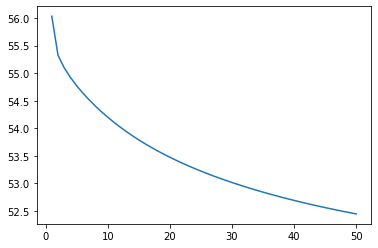

In [36]:
# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(train.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * train.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(scaled_df.iloc[i], w, 'sigmoid')
#         w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E)

# plt.plot(iteration, e_lst_test)


##Adding bias


**Problem: If we don't shuffle the dataset, the Error is lower than when, the dataset is shuffled**

In [37]:
df_bias = scaled_df
df_bias["bias"] = -1
# df_bias = df_bias.sample(frac=1.).reset_index(drop=True)
w_bias = Rand(df_bias.shape[1])
n_learning = df_bias.shape[0]
n_learning
# w_bias.shape
# df_bias.shape
# df_bias

569

## Training complete dataset with bias

epoch_1 - input_1: 0.0007237028142335599
epoch_1 - input_2: 0.003544946080904686
epoch_1 - input_3: 0.003676535896562194
epoch_1 - input_4: 0.0051716141470600305
epoch_1 - input_5: 0.005324679984601861
epoch_1 - input_6: 0.006518689050454787
epoch_1 - input_7: 0.007119559341570593
epoch_1 - input_8: 0.007310813168219942
epoch_1 - input_9: 0.007708307230725296
epoch_1 - input_10: 0.00872503217934213
epoch_1 - input_11: 0.009028641782073831
epoch_1 - input_12: 0.00953203225013182
epoch_1 - input_13: 0.01051588533312207
epoch_1 - input_14: 0.010658667270372029
epoch_1 - input_15: 0.011012341411473357
epoch_1 - input_16: 0.01182175479421934
epoch_1 - input_17: 0.012442244350322387
epoch_1 - input_18: 0.012548324639813027
epoch_1 - input_19: 0.012685653326853421
epoch_1 - input_20: 0.48825181210190605
epoch_1 - input_21: 0.9492974102129449
epoch_1 - input_22: 1.4290847924595922
epoch_1 - input_23: 1.4299431129736244
epoch_1 - input_24: 1.4307417883516347
epoch_1 - input_25: 1.43147365096718

epoch_5 - input_70: 11.288113203414984
epoch_5 - input_71: 11.633510081628295
epoch_5 - input_72: 11.66190799915512
epoch_5 - input_73: 11.907622100489519
epoch_5 - input_74: 12.053593296088149
epoch_5 - input_75: 12.121972912507081
epoch_5 - input_76: 12.229910620176026
epoch_5 - input_77: 12.23265830553333
epoch_5 - input_78: 12.306238979450171
epoch_5 - input_79: 12.413490514105236
epoch_5 - input_80: 12.462401948809523
epoch_5 - input_81: 12.606802185080044
epoch_5 - input_82: 12.732013901216508
epoch_5 - input_83: 12.889478242748895
epoch_5 - input_84: 13.06227587579977
epoch_5 - input_85: 13.062453096054202
epoch_5 - input_86: 13.306268449149291
epoch_5 - input_87: 13.488983465490296
epoch_5 - input_88: 13.565779675284581
epoch_5 - input_89: 13.690261753105652
epoch_5 - input_90: 13.861333863399476
epoch_5 - input_91: 13.931789152047244
epoch_5 - input_92: 14.0028889826981
epoch_5 - input_93: 14.149405653271879
epoch_5 - input_94: 14.337053684993354
epoch_5 - input_95: 14.4976533

epoch_6 - input_532: 65.97966710902573
epoch_6 - input_533: 66.02164596853042
epoch_6 - input_534: 66.18405539693377
epoch_6 - input_535: 66.30087633852519
epoch_6 - input_536: 66.70989617173443
epoch_6 - input_537: 67.26063450104853
epoch_6 - input_538: 67.35230760936355
epoch_6 - input_539: 67.3928830711708
epoch_6 - input_540: 67.40378390293111
epoch_6 - input_541: 67.42241906978848
epoch_6 - input_542: 67.54653110771598
epoch_6 - input_543: 67.54661407385264
epoch_6 - input_544: 67.66130789965261
epoch_6 - input_545: 67.75698127113927
epoch_6 - input_546: 67.86566713986413
epoch_6 - input_547: 68.03212268455266
epoch_6 - input_548: 68.17946540045793
epoch_6 - input_549: 68.27090769002378
epoch_6 - input_550: 68.4070496194105
epoch_6 - input_551: 68.47914179574498
epoch_6 - input_552: 68.54676833746143
epoch_6 - input_553: 68.63803599728524
epoch_6 - input_554: 68.73416642714959
epoch_6 - input_555: 68.73447781245592
epoch_6 - input_556: 68.84035623402173
epoch_6 - input_557: 68.850

epoch_26 - input_325: 43.3289035682688
epoch_26 - input_326: 43.42463243490705
epoch_26 - input_327: 43.49147219343344
epoch_26 - input_328: 43.60390513503498
epoch_26 - input_329: 43.75219980001959
epoch_26 - input_330: 43.941697431870516
epoch_26 - input_331: 44.19805260383155
epoch_26 - input_332: 44.32062524705091
epoch_26 - input_333: 44.441841672960976
epoch_26 - input_334: 44.54238393222658
epoch_26 - input_335: 44.644383084486776
epoch_26 - input_336: 44.7762580112508
epoch_26 - input_337: 44.831726297359175
epoch_26 - input_338: 45.01132859958579
epoch_26 - input_339: 45.08012139681504
epoch_26 - input_340: 45.20932546450904
epoch_26 - input_341: 45.24507865029141
epoch_26 - input_342: 45.3477958923272
epoch_26 - input_343: 45.48078077702126
epoch_26 - input_344: 45.63619602545806
epoch_26 - input_345: 45.717928845064066
epoch_26 - input_346: 45.80685141460688
epoch_26 - input_347: 45.83386971947578
epoch_26 - input_348: 45.889177116619024
epoch_26 - input_349: 45.979237234280

epoch_32 - input_436: 54.42277272783023
epoch_32 - input_437: 54.478876540605235
epoch_32 - input_438: 54.58034840685559
epoch_32 - input_439: 54.65361889144349
epoch_32 - input_440: 54.75739602764775
epoch_32 - input_441: 54.78981061805827
epoch_32 - input_442: 54.920647343952126
epoch_32 - input_443: 54.94001958552595
epoch_32 - input_444: 54.99288515011338
epoch_32 - input_445: 55.144719769096255
epoch_32 - input_446: 55.23940636566027
epoch_32 - input_447: 55.41372504727418
epoch_32 - input_448: 55.43959668476065
epoch_32 - input_449: 55.49861488983513
epoch_32 - input_450: 55.782991909604476
epoch_32 - input_451: 55.86061577597508
epoch_32 - input_452: 56.04265296357512
epoch_32 - input_453: 56.078135625751194
epoch_32 - input_454: 56.15796389576918
epoch_32 - input_455: 56.26304866327083
epoch_32 - input_456: 56.34655395308572
epoch_32 - input_457: 56.352052737700006
epoch_32 - input_458: 56.38839352827815
epoch_32 - input_459: 56.47330337077899
epoch_32 - input_460: 56.544855835

epoch_38 - input_396: 50.19059699717632
epoch_38 - input_397: 50.19219011409407
epoch_38 - input_398: 50.23253921270246
epoch_38 - input_399: 50.30893820191722
epoch_38 - input_400: 50.38823212113404
epoch_38 - input_401: 50.605190084098524
epoch_38 - input_402: 50.662427397419805
epoch_38 - input_403: 50.764493088084976
epoch_38 - input_404: 50.797678426864785
epoch_38 - input_405: 50.91232369876908
epoch_38 - input_406: 50.96071792586759
epoch_38 - input_407: 51.01581378215509
epoch_38 - input_408: 51.08258814542693
epoch_38 - input_409: 51.22427035055757
epoch_38 - input_410: 51.326762525825785
epoch_38 - input_411: 51.445785111902076
epoch_38 - input_412: 51.54661976642421
epoch_38 - input_413: 51.6252328131956
epoch_38 - input_414: 51.71429613814494
epoch_38 - input_415: 52.00295477982699
epoch_38 - input_416: 52.09065697121728
epoch_38 - input_417: 52.1962273784789
epoch_38 - input_418: 52.52946289183992
epoch_38 - input_419: 52.563589871762474
epoch_38 - input_420: 52.6244054752

epoch_45 - input_151: 21.353218108871605
epoch_45 - input_152: 21.467655098937907
epoch_45 - input_153: 21.51429028038186
epoch_45 - input_154: 21.61531129116052
epoch_45 - input_155: 21.723777469579133
epoch_45 - input_156: 21.793971967484527
epoch_45 - input_157: 22.011989243532554
epoch_45 - input_158: 22.061956768867294
epoch_45 - input_159: 22.17190157286924
epoch_45 - input_160: 22.188295235507415
epoch_45 - input_161: 22.25628521337835
epoch_45 - input_162: 22.390540794286608
epoch_45 - input_163: 22.57746452498663
epoch_45 - input_164: 22.705820753907716
epoch_45 - input_165: 22.88998490687161
epoch_45 - input_166: 22.942022493696207
epoch_45 - input_167: 23.03374858550764
epoch_45 - input_168: 23.27669725992595
epoch_45 - input_169: 23.560089373170324
epoch_45 - input_170: 23.618501984003895
epoch_45 - input_171: 23.70293537701832
epoch_45 - input_172: 23.846944549701497
epoch_45 - input_173: 24.077824005163496
epoch_45 - input_174: 24.142312290026954
epoch_45 - input_175: 24.

epoch_46 - input_153: 21.500076983999655
epoch_46 - input_154: 21.600777747574877
epoch_46 - input_155: 21.708522238640338
epoch_46 - input_156: 21.778840196409032
epoch_46 - input_157: 21.996272225285935
epoch_46 - input_158: 22.046765943473183
epoch_46 - input_159: 22.15653482540159
epoch_46 - input_160: 22.17337569552604
epoch_46 - input_161: 22.241448758926342
epoch_46 - input_162: 22.37608019229643
epoch_46 - input_163: 22.563302566677073
epoch_46 - input_164: 22.69091470977339
epoch_46 - input_165: 22.876195457755067
epoch_46 - input_166: 22.927880589931707
epoch_46 - input_167: 23.019303902793254
epoch_46 - input_168: 23.260828851629928
epoch_46 - input_169: 23.543409891839474
epoch_46 - input_170: 23.601381785890204
epoch_46 - input_171: 23.68600043806251
epoch_46 - input_172: 23.83061682408308
epoch_46 - input_173: 24.060779746665204
epoch_46 - input_174: 24.125272031838254
epoch_46 - input_175: 24.221790670472434
epoch_46 - input_176: 24.304007937808702
epoch_46 - input_177: 

epoch_50 - input_281: 38.31277090270116
epoch_50 - input_282: 38.37704311782662
epoch_50 - input_283: 38.51618063353613
epoch_50 - input_284: 38.676652896101885
epoch_50 - input_285: 38.78204541158246
epoch_50 - input_286: 38.89180052284079
epoch_50 - input_287: 38.97029726913588
epoch_50 - input_288: 39.0427204764577
epoch_50 - input_289: 39.13339482448791
epoch_50 - input_290: 39.18448273840998
epoch_50 - input_291: 39.282635198555624
epoch_50 - input_292: 39.341321388042736
epoch_50 - input_293: 39.42841229491308
epoch_50 - input_294: 39.513606232264394
epoch_50 - input_295: 39.56983527835918
epoch_50 - input_296: 39.680465213922936
epoch_50 - input_297: 39.73769094948906
epoch_50 - input_298: 39.95612636638496
epoch_50 - input_299: 40.02835894351898
epoch_50 - input_300: 40.127333577180416
epoch_50 - input_301: 40.30472114430862
epoch_50 - input_302: 40.40017535445055
epoch_50 - input_303: 40.576739296055585
epoch_50 - input_304: 40.63854779429102
epoch_50 - input_305: 40.703760902

Text(0.5, 0, 'Epoch number ')

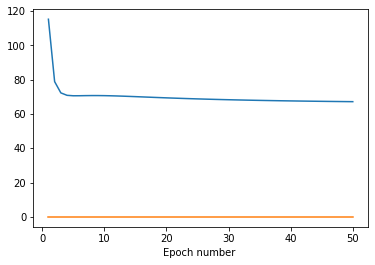

In [38]:
# with bias :


# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(df_bias.iloc[i], w_bias, 'ReLU')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

e_lst_test = []
for j in range(epoch):
    E = 0
    for i in range(n_learning, 569):
        o = O(df_bias.iloc[i], w_bias, 'sigmoid')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_test.append(E / n_learning)

plt.plot(iteration, e_lst_test)
plt.xlabel('Epoch number ')
# plt.grid()

### Train and test assignment for model with bias

In [39]:
df_bias = df_bias.sample(frac=1.).reset_index(drop=True)
train = df_bias.sample(frac = 0.8).reset_index(drop=True)
test = df_bias.drop(index = train.index).reset_index(drop=True)
print(train.shape, test.shape)
train.head()
test.head()
n_learning = train.shape[0]

(455, 31) (114, 31)


##Training "train" datas with bias

epoch_1 - input_1: 0.5
epoch_1 - input_2: 1.0
epoch_1 - input_3: 1.5
epoch_1 - input_4: 2.0
epoch_1 - input_5: 2.5
epoch_1 - input_6: 3.0
epoch_1 - input_7: 3.5
epoch_1 - input_8: 4.0
epoch_1 - input_9: 4.5
epoch_1 - input_10: 5.0
epoch_1 - input_11: 5.5
epoch_1 - input_12: 6.0
epoch_1 - input_13: 6.5
epoch_1 - input_14: 7.0
epoch_1 - input_15: 7.5
epoch_1 - input_16: 8.0
epoch_1 - input_17: 8.5
epoch_1 - input_18: 9.0
epoch_1 - input_19: 9.5
epoch_1 - input_20: 9.5
epoch_1 - input_21: 9.5
epoch_1 - input_22: 9.5
epoch_1 - input_23: 10.0
epoch_1 - input_24: 10.5
epoch_1 - input_25: 11.0
epoch_1 - input_26: 11.5
epoch_1 - input_27: 12.0
epoch_1 - input_28: 12.5
epoch_1 - input_29: 13.0
epoch_1 - input_30: 13.5
epoch_1 - input_31: 14.0
epoch_1 - input_32: 14.5
epoch_1 - input_33: 15.0
epoch_1 - input_34: 15.5
epoch_1 - input_35: 16.0
epoch_1 - input_36: 16.5
epoch_1 - input_37: 17.0
epoch_1 - input_38: 17.0
epoch_1 - input_39: 17.5
epoch_1 - input_40: 18.0
epoch_1 - input_41: 18.5
epoch_

epoch_42 - input_405: 87.0
epoch_42 - input_406: 87.0
epoch_42 - input_407: 87.0
epoch_42 - input_408: 87.0
epoch_42 - input_409: 87.5
epoch_42 - input_410: 87.5
epoch_42 - input_411: 87.5
epoch_42 - input_412: 87.5
epoch_42 - input_413: 87.5
epoch_42 - input_414: 87.5
epoch_42 - input_415: 88.0
epoch_42 - input_416: 88.0
epoch_42 - input_417: 88.0
epoch_42 - input_418: 88.5
epoch_42 - input_419: 88.5
epoch_42 - input_420: 88.5
epoch_42 - input_421: 88.5
epoch_42 - input_422: 88.5
epoch_42 - input_423: 88.5
epoch_42 - input_424: 88.5
epoch_42 - input_425: 88.5
epoch_42 - input_426: 88.5
epoch_42 - input_427: 88.5
epoch_42 - input_428: 88.5
epoch_42 - input_429: 88.5
epoch_42 - input_430: 88.5
epoch_42 - input_431: 89.0
epoch_42 - input_432: 89.0
epoch_42 - input_433: 89.5
epoch_42 - input_434: 90.0
epoch_42 - input_435: 90.0
epoch_42 - input_436: 90.5
epoch_42 - input_437: 90.5
epoch_42 - input_438: 90.5
epoch_42 - input_439: 90.5
epoch_42 - input_440: 90.5
epoch_42 - input_441: 90.5
e

epoch_47 - input_48: 21.5
epoch_47 - input_49: 21.5
epoch_47 - input_50: 21.5
epoch_47 - input_51: 21.5
epoch_47 - input_52: 21.5
epoch_47 - input_53: 21.5
epoch_47 - input_54: 22.0
epoch_47 - input_55: 22.5
epoch_47 - input_56: 22.5
epoch_47 - input_57: 23.0
epoch_47 - input_58: 23.5
epoch_47 - input_59: 23.5
epoch_47 - input_60: 23.5
epoch_47 - input_61: 23.5
epoch_47 - input_62: 23.5
epoch_47 - input_63: 24.0
epoch_47 - input_64: 24.0
epoch_47 - input_65: 24.5
epoch_47 - input_66: 25.0
epoch_47 - input_67: 25.0
epoch_47 - input_68: 25.0
epoch_47 - input_69: 25.0
epoch_47 - input_70: 25.0
epoch_47 - input_71: 25.5
epoch_47 - input_72: 25.5
epoch_47 - input_73: 26.0
epoch_47 - input_74: 26.5
epoch_47 - input_75: 26.5
epoch_47 - input_76: 27.0
epoch_47 - input_77: 27.0
epoch_47 - input_78: 27.5
epoch_47 - input_79: 28.0
epoch_47 - input_80: 28.0
epoch_47 - input_81: 28.0
epoch_47 - input_82: 28.0
epoch_47 - input_83: 28.5
epoch_47 - input_84: 29.0
epoch_47 - input_85: 29.0
epoch_47 - i

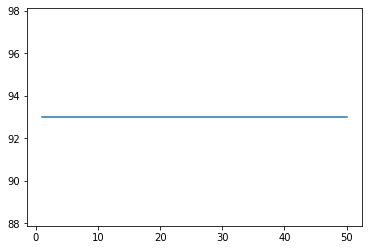

In [40]:
# with bias :


# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(train.iloc[i], w_bias, 'sigmoid')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * train.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(df_bias.iloc[i], w_bias, 'sigmoid')
#         w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E / n_learning)

# plt.plot(iteration, e_lst_test)
# plt.xlabel('Epoch number ')
# # plt.grid()